Need to mount the drive to acess the dataset since the dataset is large.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=6121750fdff7c6c81155fbbd166f984bdeb0306b75003e5a8213c8f38f95d125
  Stored in directory: /root/.cache/pip/wheels/37/01/19/e6c69a32684ab7b2e3ea4985a571d810cf055c72600e7f9f17
Successfully built python_speech_features


###Imports and Load data

In [3]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import seaborn as sns
import librosa.display
import librosa

import os
import math
import pickle
import random
import operator


import math
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Additional libraries for data preprocessing and visualization
import cv2
from sklearn.model_selection import train_test_split


In [4]:
data = pd.read_csv('/content/drive/MyDrive/features_3_sec.csv')


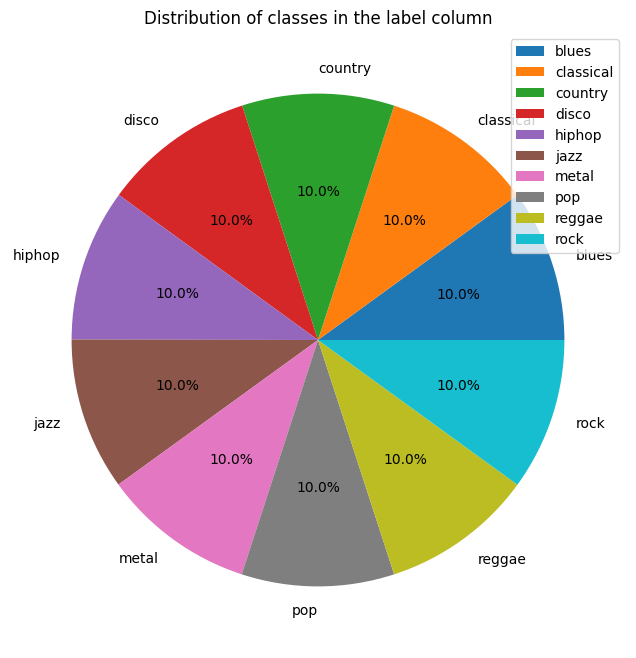

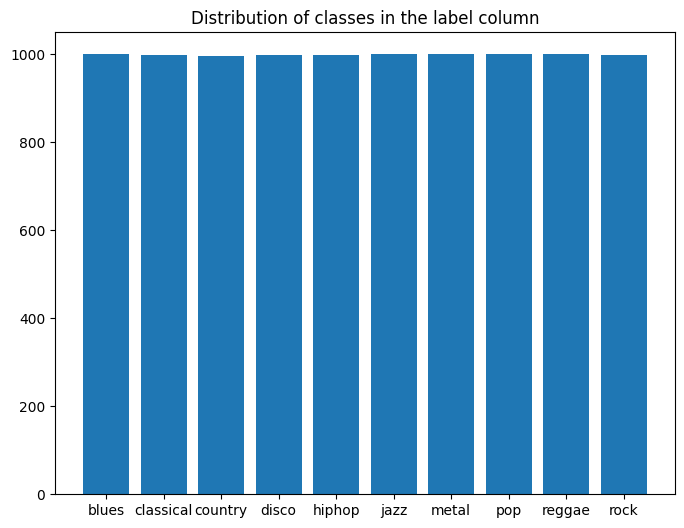

In [5]:
#visualize the distribution of classes in the label column
count = [] #count of each data value
labels = data['label'].unique() #distinct label values

for i in labels:
  count.append(data[data['label']==i]['label'].count()) #storing count and labels in same order

#pie chart
plt.figure(figsize=(8, 8)) #size of figure
plt.pie(count, labels = labels,autopct='%1.1f%%') #pie chart labels and corresponding values
plt.title('Distribution of classes in the label column') #title of pie chart
plt.legend() #displays the legend
plt.show() #displays the pie chart

#bar plot
plt.figure(figsize=(8, 6)) #size of figure
plt.bar(labels, count) #(x axis, y axis)
plt.title('Distribution of classes in the label column') # title of bar plot
plt.show() #displays the graph



### Random Forest Model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
scaled_df = pd.DataFrame(np_scaled, columns = cols)
scaled_df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.0,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.0,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.0,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.0,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [7]:
# Assuming X contains your features and y contains the corresponding labels
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

       blues       0.87      0.87      0.87       208
   classical       0.94      0.98      0.96       203
     country       0.80      0.84      0.82       186
       disco       0.85      0.83      0.84       199
      hiphop       0.92      0.89      0.90       218
        jazz       0.86      0.93      0.89       192
       metal       0.87      0.95      0.91       204
         pop       0.92      0.95      0.93       180
      reggae       0.92      0.88      0.90       211
        rock       0.89      0.72      0.79       197

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998



<ipython-input-8-e7f1ac455952>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_importances, palette="viridis")


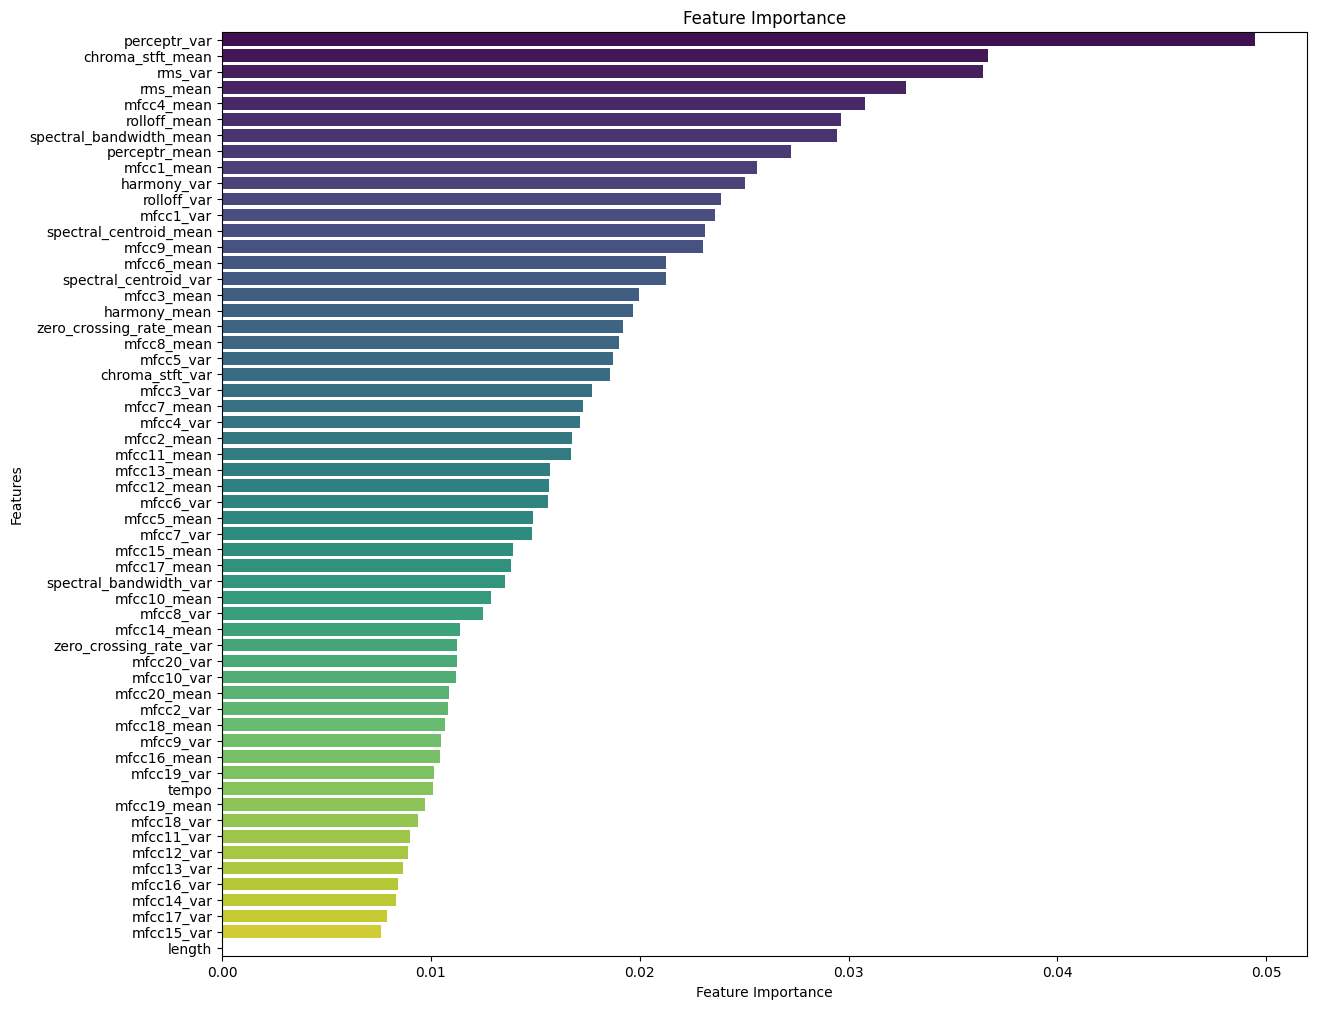

In [8]:
#Visualize Feature Importances #24
#added
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})


feature_importances=feature_importances.sort_values(by="importance" ,ascending =False)

#plot

plt.figure(figsize=(14,12))
sns.barplot(x="importance", y="feature", data=feature_importances, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

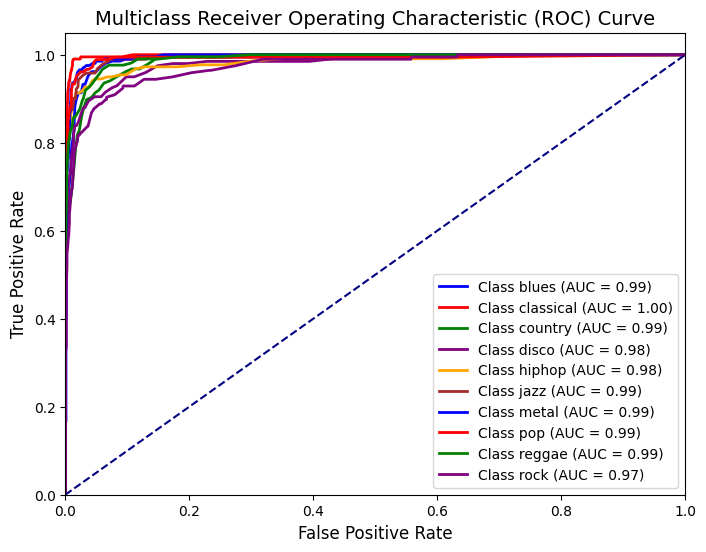

In [9]:
#Create a function to plot the ROC curve for the model. #29
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

def plot_multiclass_roc(model, X_test, y_test, class_labels):

    # Binarize the labels
    y_test_bin = label_binarize(y_test, classes=class_labels)
    n_classes = y_test_bin.shape[1]

    # Get predicted probabilities
    y_probs = model.predict_proba(X_test)

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
                 label=f"Class {class_labels[i]} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

    # Labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title("Multiclass Receiver Operating Characteristic (ROC) Curve", fontsize=14)
    plt.legend(loc="lower right")
    plt.show()

class_labels = np.unique(y_test)

# Call the function
plot_multiclass_roc(rf_model, X_test, y_test, class_labels)

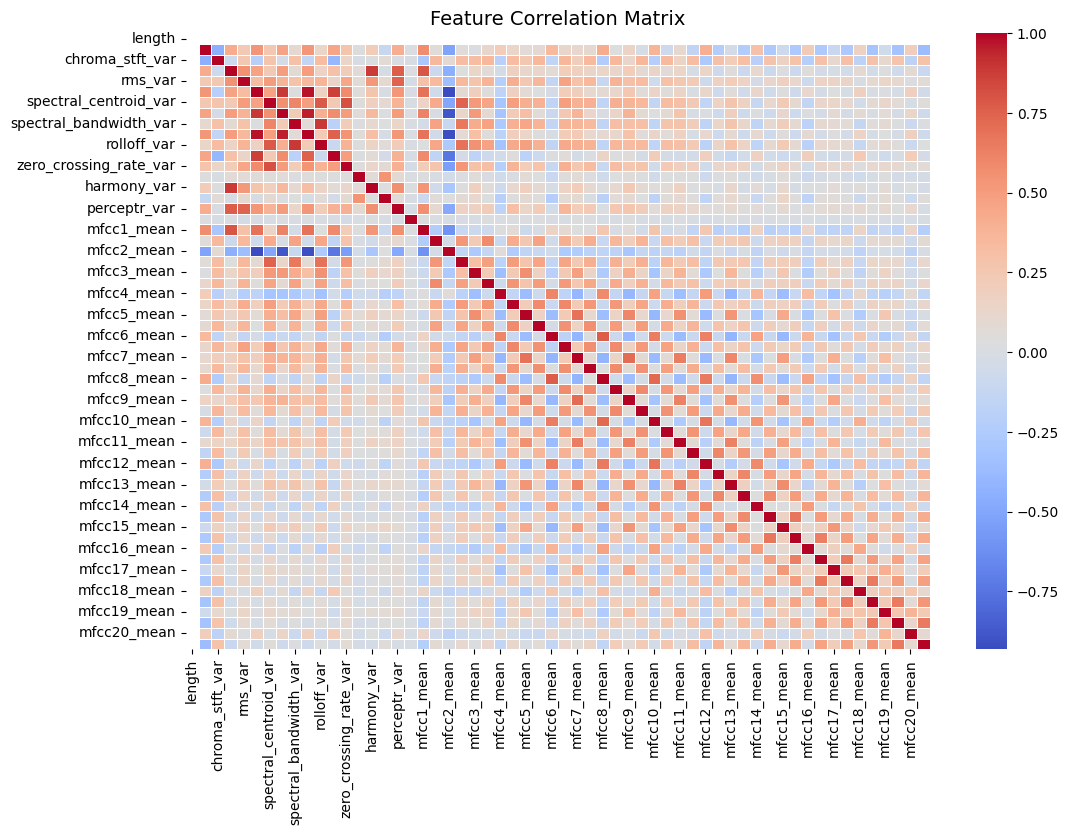

In [10]:
#Use sns.heatmap to visualize the correlation matrix of features in the dataset. #31

import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 8))
    correlation_matrix = data.corr()

    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Matrix", fontsize=14)
    plt.show()

plot_correlation_matrix(X)


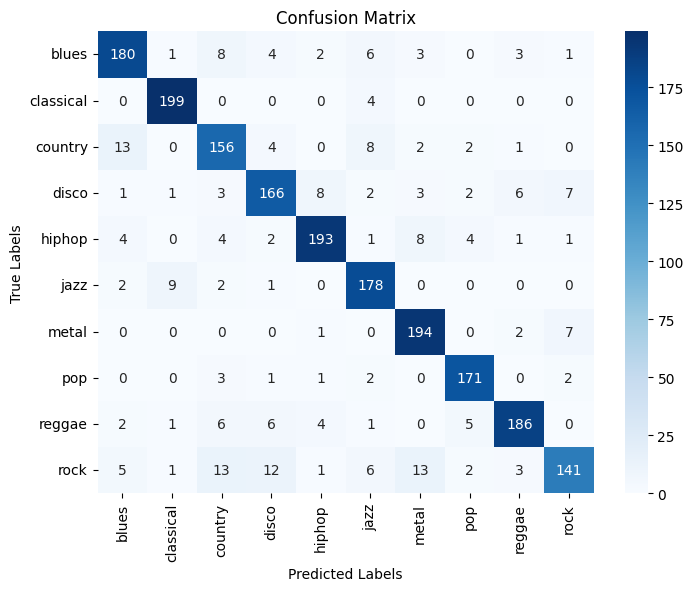

In [11]:
#Visualize the Confusion Matrix #25

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_labels):

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

class_labels = y.unique()
plot_confusion_matrix(y_test, y_pred, class_labels)


In [12]:
#Evaluating Model With Additional Metrics

from sklearn.metrics import log_loss

y_probs = rf_model.predict_proba(X_test)
logloss = log_loss(y_test, y_probs)
print(f"Log Loss: {logloss:.4f}")


Log Loss: 0.7118


In [13]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Matthews Correlation Coefficient (MCC): 0.8701


In [14]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")


Cohen's Kappa Score: 0.8698


Summary of Metrics

Log Loss: 0.7118 : The model's probability estimates are fairly reliable.

MCC: 0.8701 : High correlation between predicted and true labels.

Cohen's Kappa: 0.8698 : Strong agreement between predictions and true values.


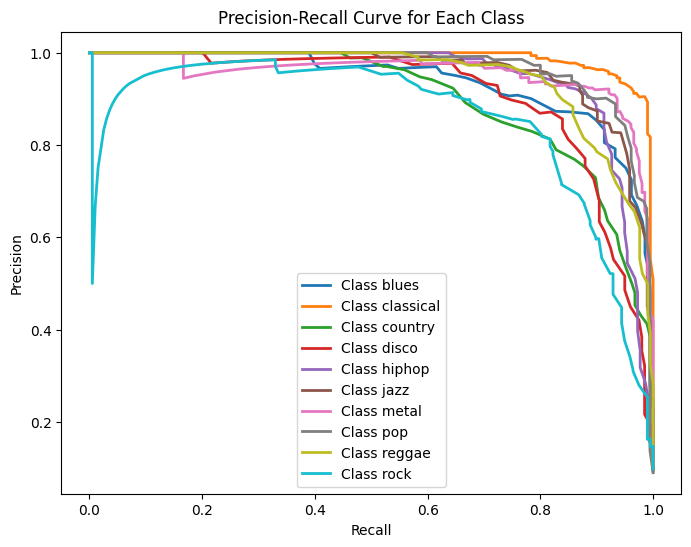

In [16]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=class_labels)

# Get predicted probabilities
y_probs = rf_model.predict_proba(X_test)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
for i in range(len(class_labels)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_probs[:, i])
    plt.plot(recall, precision, lw=2, label=f"Class {class_labels[i]}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='best')
plt.show()


 Model performs exceptionally well on certain classes, notably "classical" and "blues."

  Classes like "country," "disco," "hiphop," and "jazz" also show generally good performance

  There's room for improvement in handling genres like "metal" and "reggae."